In [4]:
from sklearn import datasets
from sklearn import svm
import pandas as pd
from numpy import genfromtxt
# Stemming purposes
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# Splitting Dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn import metrics
import numpy as np
import itertools
#Helper

import matplotlib.pyplot as plt


#PLOT Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('')
#         print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# <center>  Dataset Parse </center>

In [5]:

data_set = pd.read_csv("fake_or_real_news.csv")
    
# # Inspect shape of `df` 
# print(df.shape)

# # Print first lines of `df` 
# print(df.head())
# df = df.set_index("Unnamed: 0") 
# df.head()
# print(df.label)
# def loadDataset():
#     iris = datasets.load_iris()
# #     print(iris.target)
#     return iris.data, iris.target

# <center> Stemming Approach </center>

In [8]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def stemmer_function(text):
    words = word_tokenize(text)
    ret = "";
    for w in words:
        ret = ret + " " + stemmer.stem(w)
    return ret
# print(stemmer_function("Iâ€™m not an immigrant, but my grandparents are. More than"))

# <center> Stemming Text </center>

In [10]:
news = data_set['text']
y = data_set.label 
index_array = y.index.values
verdict = []
stemmed_news = []
counter = 0
for index in index_array:
    val = y.at[index]
    verdict.append(val)
    n = stemmer_function(news.at[index])
    stemmed_news.append(n)
    counter += 1
    if counter % 500 == 0:
        print('#Pre Processed', counter , "of", len(news), str(counter*1./len(news)*100.0) + '%')
#     if(counter > 1000):
#         break

# for i in range(min(len(news) , 25)):
#     print(i , stemmed_news[i][0:60], '----->', verdict[i])

# print('OK')

#Pre Processed 500 of 6335 7.892659826361484%
#Pre Processed 1000 of 6335 15.785319652722968%
#Pre Processed 1500 of 6335 23.677979479084453%
#Pre Processed 2000 of 6335 31.570639305445937%
#Pre Processed 2500 of 6335 39.46329913180742%
#Pre Processed 3000 of 6335 47.355958958168905%
#Pre Processed 3500 of 6335 55.24861878453039%
#Pre Processed 4000 of 6335 63.141278610891874%
#Pre Processed 4500 of 6335 71.03393843725335%
#Pre Processed 5000 of 6335 78.92659826361484%
#Pre Processed 5500 of 6335 86.81925808997633%
#Pre Processed 6000 of 6335 94.71191791633781%


# <center>  Splitting Dataset </center>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(stemmed_news, verdict, test_size=0.4, random_state=53)
print("Dataset Splitted.")

Dataset Splitted.


# <center>  Applying TF-IDF </center>

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

print("TF-IDF Training Started\n->->->")
# print(tfidf_train)
print("TF-IDF Training Ended")

TF-IDF Training Started
->->->
TF-IDF Training Ended


# <center>  Feature Extract </center>

In [13]:
print('Sample features names\n',tfidf_vectorizer.get_feature_names()[1500:1600:5], '\n')
# print(count_vectorizer.get_feature_names()[900:910])

feature_arr = tfidf_vectorizer.get_feature_names()

for i in range(1500, 1600, 5):
    val = tfidf_vectorizer.vocabulary_[feature_arr[i]]
    print(feature_arr[i] , " ----> " , val)
# print(tfidf_vectorizer)

Sample features names
 ['7d', '7million', '7th', '801', '807', '812', '81p', '826', '837', '844', '847', '8559', '86362001', '86b', '873', '88', '886', '8922', '8981', '8cft9hd0ri'] 

7d  ---->  1500
7million  ---->  1505
7th  ---->  1510
801  ---->  1515
807  ---->  1520
812  ---->  1525
81p  ---->  1530
826  ---->  1535
837  ---->  1540
844  ---->  1545
847  ---->  1550
8559  ---->  1555
86362001  ---->  1560
86b  ---->  1565
873  ---->  1570
88  ---->  1575
886  ---->  1580
8922  ---->  1585
8981  ---->  1590
8cft9hd0ri  ---->  1595


In [96]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
# print(tfidf_df.tail())

# <center> Random Forest Classifier </center>

Accuracy:   87.10%



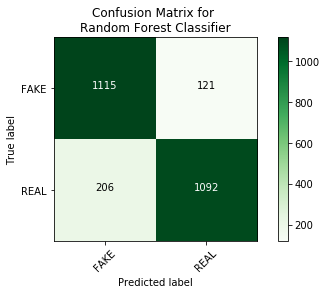

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators = 26 , criterion = 'entropy' , random_state = 0)

clf_rand.fit(tfidf_train, y_train)

pred_rand = clf_rand.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred_rand)

print("Accuracy:   %0.2f" % (score*100.) + "%")
cm = metrics.confusion_matrix(y_test, pred_rand, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, 
                      classes=['FAKE', 'REAL'], 
                      title="Confusion Matrix for \nRandom Forest Classifier",
                      cmap = plt.cm.Greens
                     )

# <center> Naive Bayes </center>

Accuracy:   85.20%



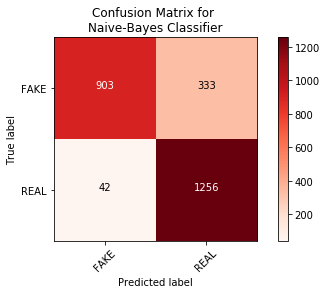

In [15]:
from sklearn.naive_bayes import MultinomialNB
import itertools

naive_classifier = MultinomialNB()
naive_classifier.fit(tfidf_train, y_train)
pred_tree = naive_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred_tree)
print("Accuracy:   %0.2f" % (score*100.) + "%")
cm = metrics.confusion_matrix(y_test, pred_tree, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, 
                      classes=['FAKE', 'REAL'], 
                      title="Confusion Matrix for \nNaive-Bayes Classifier",
                      cmap = plt.cm.Reds
                     )

# <center>  SVM Classifier </center>

Accuracy:   81.49%



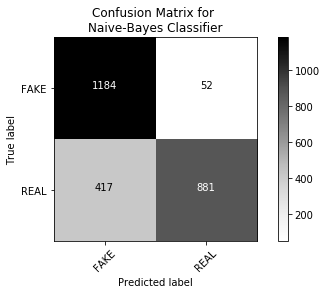

In [16]:
from sklearn import svm

clf_svm = svm.SVC(probability=True, C=1000)

clf_svm.fit(tfidf_train, y_train)
pred_svm = clf_svm.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_svm)
print("Accuracy:   %0.2f" % (score*100.) + "%")
cm = metrics.confusion_matrix(y_test, pred_svm, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, 
                      classes=['FAKE', 'REAL'], 
                      title="Confusion Matrix for \nNaive-Bayes Classifier",
                      cmap = plt.cm.Greys
                     )